In [2]:
!pip install imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score,LeaveOneOut,GridSearchCV
from imblearn.over_sampling import SMOTE,SMOTENC

In [4]:
 hd_df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


(array([  2.,   5., 363.,  95., 200., 117.,  44.,  17.,   1.,   2.]),
 array([-2.6 , -1.72, -0.84,  0.04,  0.92,  1.8 ,  2.68,  3.56,  4.44,
         5.32,  6.2 ]),
 <BarContainer object of 10 artists>)

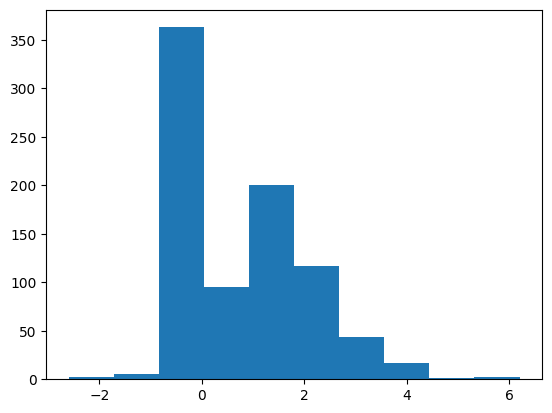

In [6]:
#EDA 
plt.hist(hd_df.oldpeak)

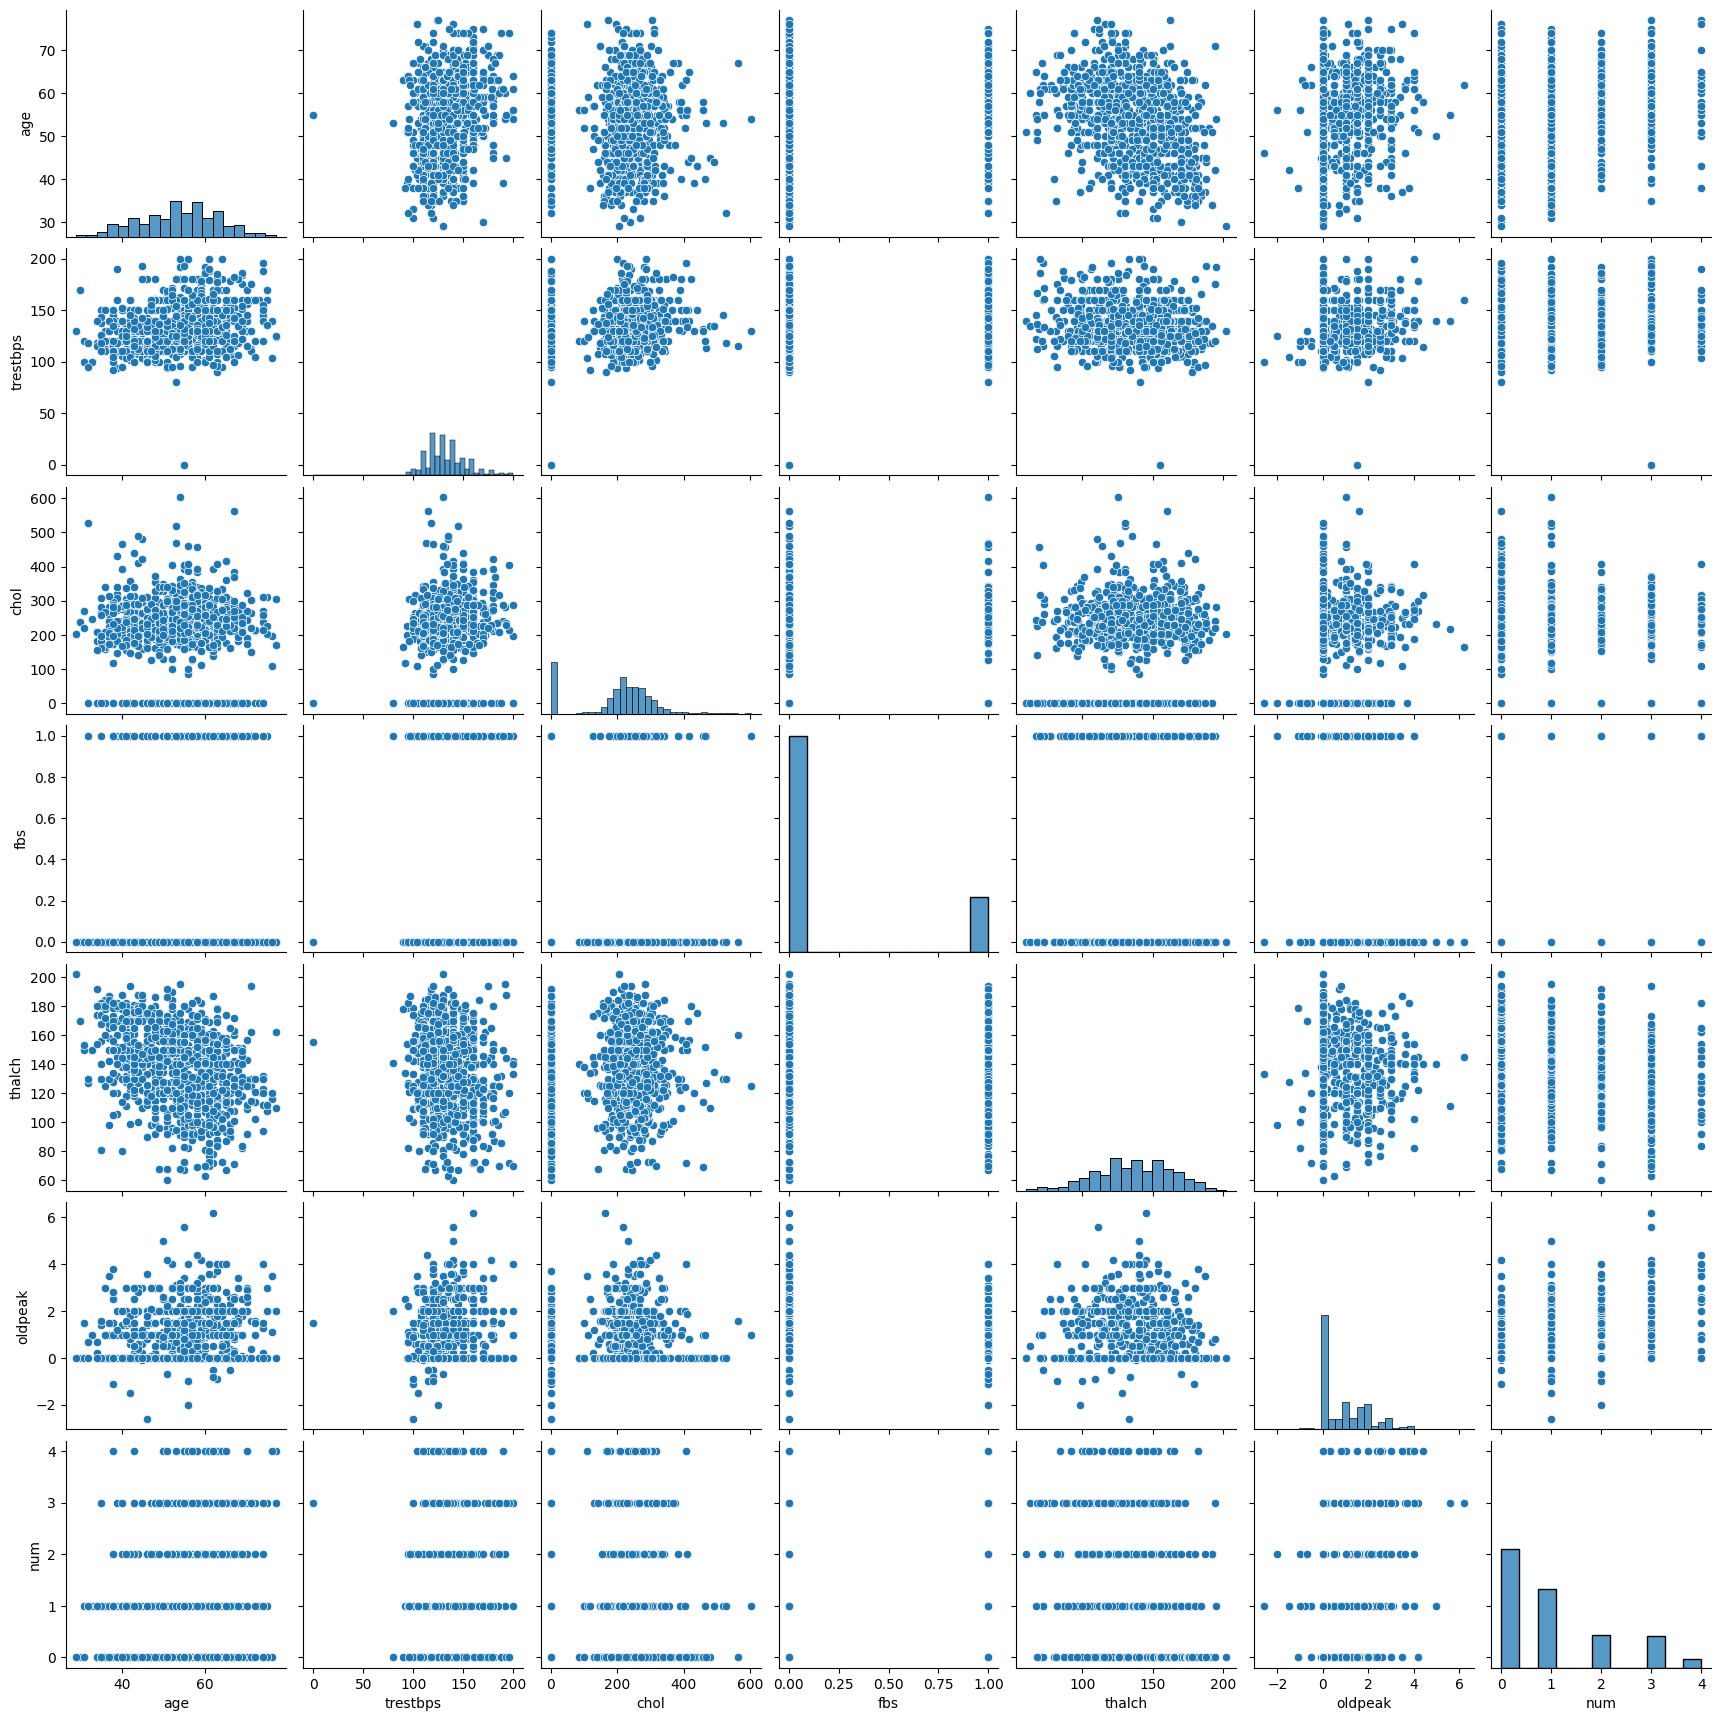

In [7]:
sns.pairplot(hd_df)

In [8]:
heart_0 = hd_df[hd_df.num==0]
heart_1 = hd_df[hd_df.num==1]
heart_2 = hd_df[hd_df.num==2]
heart_3 = hd_df[hd_df.num==3]
heart_4 = hd_df[hd_df.num==4]

In [9]:
print(f'patients with no heart disease :\n\n{heart_0.describe()}',end='\n\n\n')
print(f'patients with  heart disease = 1 :\n\n{heart_1.describe()}',end='\n\n\n')
print(f'patients with heart disease = 2 :\n\n{heart_2.describe()}',end='\n\n\n')
print(f'patients with heart disease = 3 :\n\n{heart_3.describe()}',end='\n\n\n')
print(f'patients with heart disease = 4 :\n\n{heart_4.describe()}',end='\n\n\n')

patients with no heart disease :

              age    trestbps        chol      thalch     oldpeak    num
count  399.000000  399.000000  399.000000  399.000000  378.000000  399.0
mean    51.097744  131.142857  231.872180  146.418546    0.431481    0.0
std      9.006584   18.504845   79.961116   25.197167    0.722975    0.0
min     29.000000   80.000000    0.000000   68.000000   -1.100000    0.0
25%     44.000000  120.000000  200.000000  130.000000    0.000000    0.0
50%     51.000000  130.000000  230.000000  150.000000    0.000000    0.0
75%     57.000000  140.000000  271.000000  165.000000    0.800000    0.0
max     76.000000  196.000000  564.000000  202.000000    4.200000    0.0


patients with  heart disease = 1 :

              age    trestbps        chol      thalch     oldpeak    num
count  265.000000  265.000000  265.000000  265.000000  250.000000  265.0
mean    53.528302  133.052830  196.181132  130.275472    1.001200    1.0
std      8.740371   20.108725  123.348013   23.88870

Text(47.20981944444445, 0.5, 'ST depression')

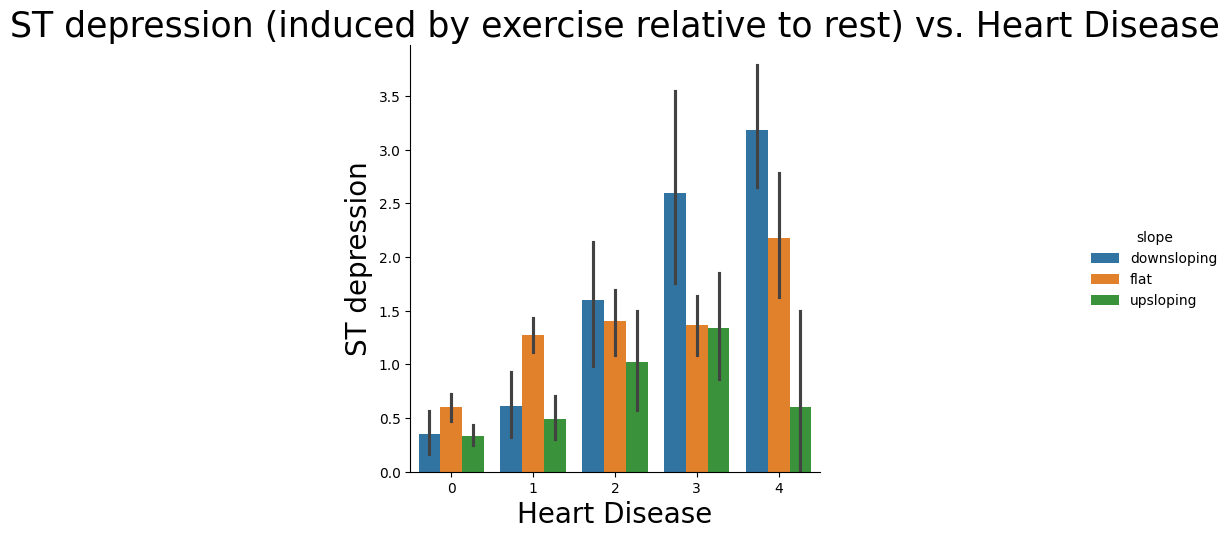

In [10]:
sns.catplot(x="num", y="oldpeak", hue="slope", kind="bar", data=hd_df);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

Text(0, 0.5, 'ST depression')

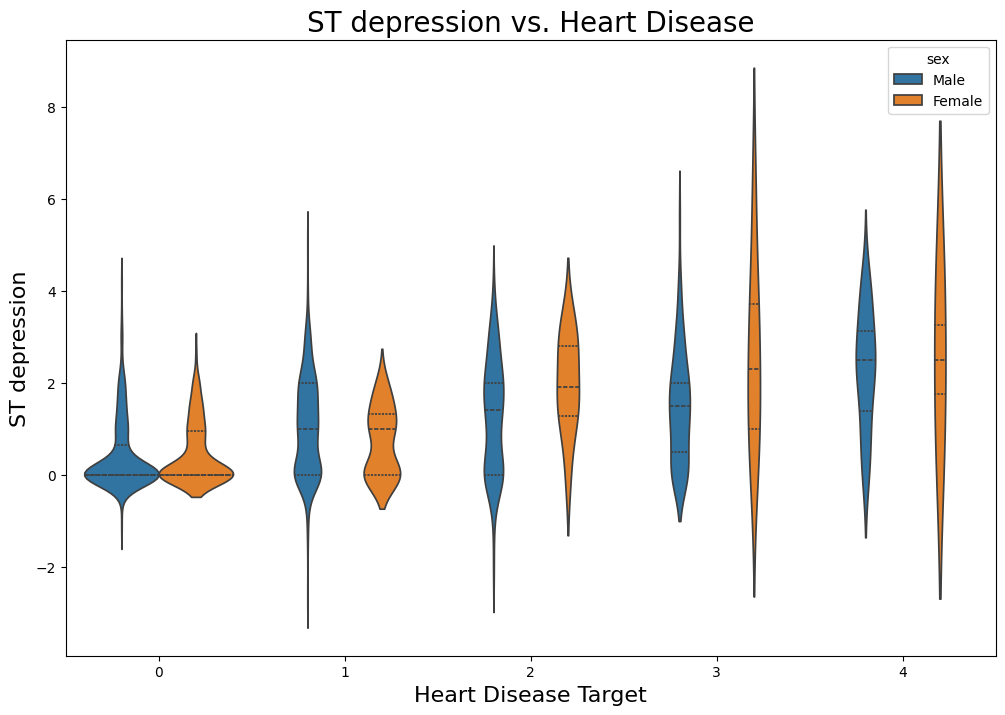

In [11]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'num', y= 'oldpeak',hue="sex", inner='quartile',data= hd_df )
plt.title("ST depression vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("ST depression", fontsize=16)

<Axes: xlabel='num', ylabel='thalch'>

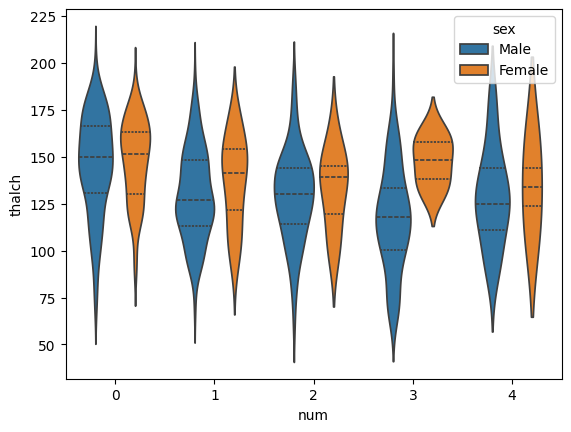

In [12]:
sns.violinplot(x= 'num', y= 'thalch',hue="sex", inner='quartile',data= hd_df )
# thalch(max heart rate achived) for patients having heart disease in females is higher than males

<Axes: xlabel='num', ylabel='chol'>

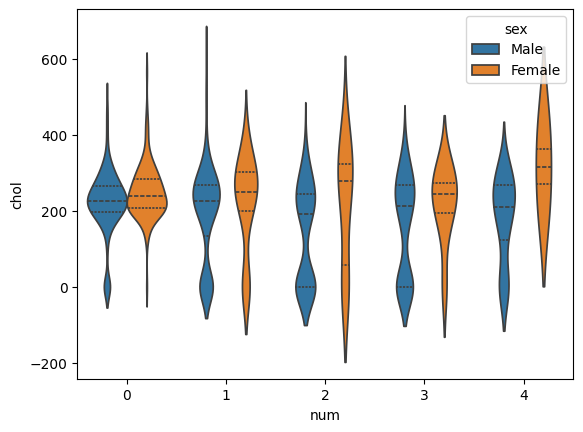

In [13]:
sns.violinplot(x= 'num', y= 'chol',hue="sex", inner='quartile',data= hd_df )

<Axes: xlabel='num', ylabel='age'>

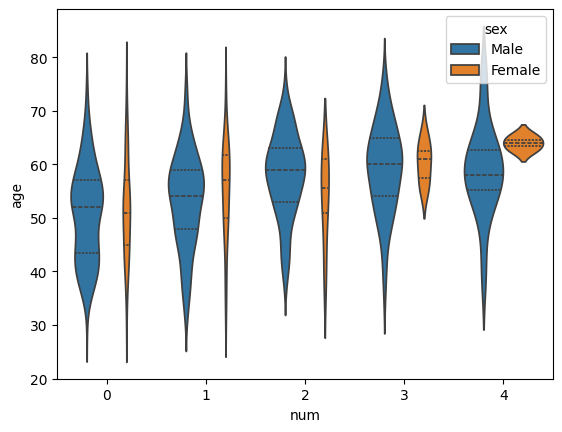

In [14]:
sns.violinplot(x= 'num', y= 'age',hue="sex", inner='quartile',data= hd_df )

<Axes: xlabel='num'>

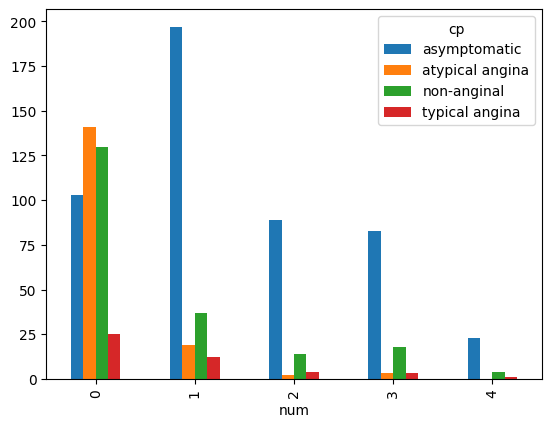

In [15]:
pd.crosstab(hd_df.num,hd_df['cp']).plot(kind="bar")
# Atypical chest pain is chest pain that doesn't meet the diagnostic criteria for typical chest pain, and it can have many causes
#that aren't heart-related
#  asymptomatic chest pain can be a sign of heart disease, such as silent myocardial ischemia (SMI) or a silent heart attack


In [16]:
#Feature engineering
hd_df.exang.value_counts()

False    516
True     337
TURE      36
FALSE     19
Name: exang, dtype: int64

In [17]:
hd_df.replace({'exang':{'TURE':True,'FALSE':False,}},inplace=True)

In [18]:
# fbs column is in boolean datatype first convert to string datatype using astype()
hd_df.fbs=hd_df.fbs.astype(str)
hd_df.exang= hd_df.exang.astype(str)

In [19]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 92.3+ KB


In [20]:
catagorical=[col for col in hd_df.columns if hd_df[col].dtypes== 'O']
numerical =[col for col in hd_df.columns if hd_df[col].dtypes!= 'O']

In [21]:
catagorical

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [22]:
sex=['Female','Male']
cp=['typical angina', 'atypical angina', 'non-anginal','asymptomatic']
fbs=['False','True']
restecg=['normal','lv hypertrophy', 'st-t abnormality']
exang=['False','True']
slope=['upsloping','flat','downsloping']
thal=[ 'normal','fixed defect','reversable defect']

In [23]:
enc= preprocessing.OrdinalEncoder(categories=[sex,cp,fbs,restecg,exang,slope,thal],dtype=int)
enc.fit(hd_df[catagorical])
hd_df[catagorical]=enc.transform(hd_df[catagorical])

In [24]:
enc.categories_

[array(['Female', 'Male'], dtype=object),
 array(['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic'],
       dtype=object),
 array(['False', 'True'], dtype=object),
 array(['normal', 'lv hypertrophy', 'st-t abnormality'], dtype=object),
 array(['False', 'True'], dtype=object),
 array(['upsloping', 'flat', 'downsloping'], dtype=object),
 array(['normal', 'fixed defect', 'reversable defect'], dtype=object)]

In [25]:
hd_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,0,145,233,1,1,150,0,2.3,2,1,0
1,41,1,1,135,203,0,0,132,0,0.0,1,1,0
2,57,1,3,140,192,0,0,148,0,0.4,1,1,0
3,52,1,0,118,186,0,1,190,0,0.0,1,1,0
4,57,1,3,110,201,0,0,126,1,1.5,1,1,0
5,66,1,3,160,228,0,1,138,0,2.3,0,1,0
6,56,1,2,130,276,0,0,128,1,1.0,0,1,0
7,48,1,2,110,211,0,0,138,0,0.0,2,1,0
8,57,1,1,140,260,1,0,140,0,0.0,2,1,0
9,53,1,2,155,175,1,2,160,0,NaN,0,1,0


In [26]:
hd_df[hd_df.num==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
880,58,1,3,114,318,0,2,140,0,4.4,2,1,4
881,64,1,3,145,212,0,1,132,0,2.0,1,1,4
882,58,1,3,130,0,0,2,100,1,1.0,1,1,4
883,61,1,3,138,166,0,1,125,1,3.6,1,0,4
884,77,1,3,125,304,0,1,162,1,0.0,0,0,4
885,70,1,3,145,174,0,0,125,1,2.6,2,2,4
886,65,0,3,150,225,0,1,114,0,1.0,1,2,4
887,57,1,3,165,289,1,1,124,0,1.0,1,2,4
888,50,1,3,150,243,0,1,128,0,2.6,1,2,4
889,63,0,3,150,407,0,1,154,0,4.0,1,2,4


In [27]:
x=hd_df.iloc[:,:-1]
y=hd_df.iloc[:,-1]

In [28]:
x.shape

(908, 12)

In [29]:
# no of observations each class contains
np.bincount(y)

array([399, 265, 109, 107,  28], dtype=int64)

In [30]:
# calculation of weights
w0= 908/(5*399)
w1= 908/(5*265)
w2= 908/(5*109)
w3= 908/(5*107)
w4= 908/(5*28)
weights = {0:w0,1:w1,2:w2,3:w3,4:w4}

In [31]:
#Decision tree classification
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [32]:
# filling null values in column oldpeak
train_x.oldpeak.fillna(train_x.oldpeak.median(),inplace=True)
test_x.oldpeak.fillna(test_x.oldpeak.median(),inplace=True)

In [33]:
train_x.shape,train_y.shape

((726, 12), (726,))

In [34]:
model=DecisionTreeClassifier(random_state=3,max_depth=4,min_samples_split=19,class_weight=weights)
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight={0: 0.45513784461152884,
                                     1: 0.6852830188679245,
                                     2: 1.6660550458715597,
                                     3: 1.697196261682243,
                                     4: 6.485714285714286},
                       max_depth=4, min_samples_split=19, random_state=3)

In [35]:
y_train_p=model.predict(train_x)
y_test_p=model.predict(test_x)

In [36]:
print(classification_report(y_train_p,train_y))
print(classification_report(y_test_p,test_y))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       275
           1       0.22      0.57      0.32        82
           2       0.47      0.22      0.30       186
           3       0.24      0.27      0.26        78
           4       0.77      0.16      0.27       105

    accuracy                           0.48       726
   macro avg       0.48      0.40      0.38       726
weighted avg       0.55      0.48      0.46       726

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        60
           1       0.15      0.53      0.24        15
           2       0.36      0.16      0.22        51
           3       0.05      0.04      0.04        26
           4       0.33      0.07      0.11        30

    accuracy                           0.38       182
   macro avg       0.30      0.33      0.26       182
weighted avg       0.38      0.38      0.34       182



In [37]:
#Hyperparameter Tunning
col= list(hd_df.columns)
col.remove('num')
cla=['0','1','2','3','4']

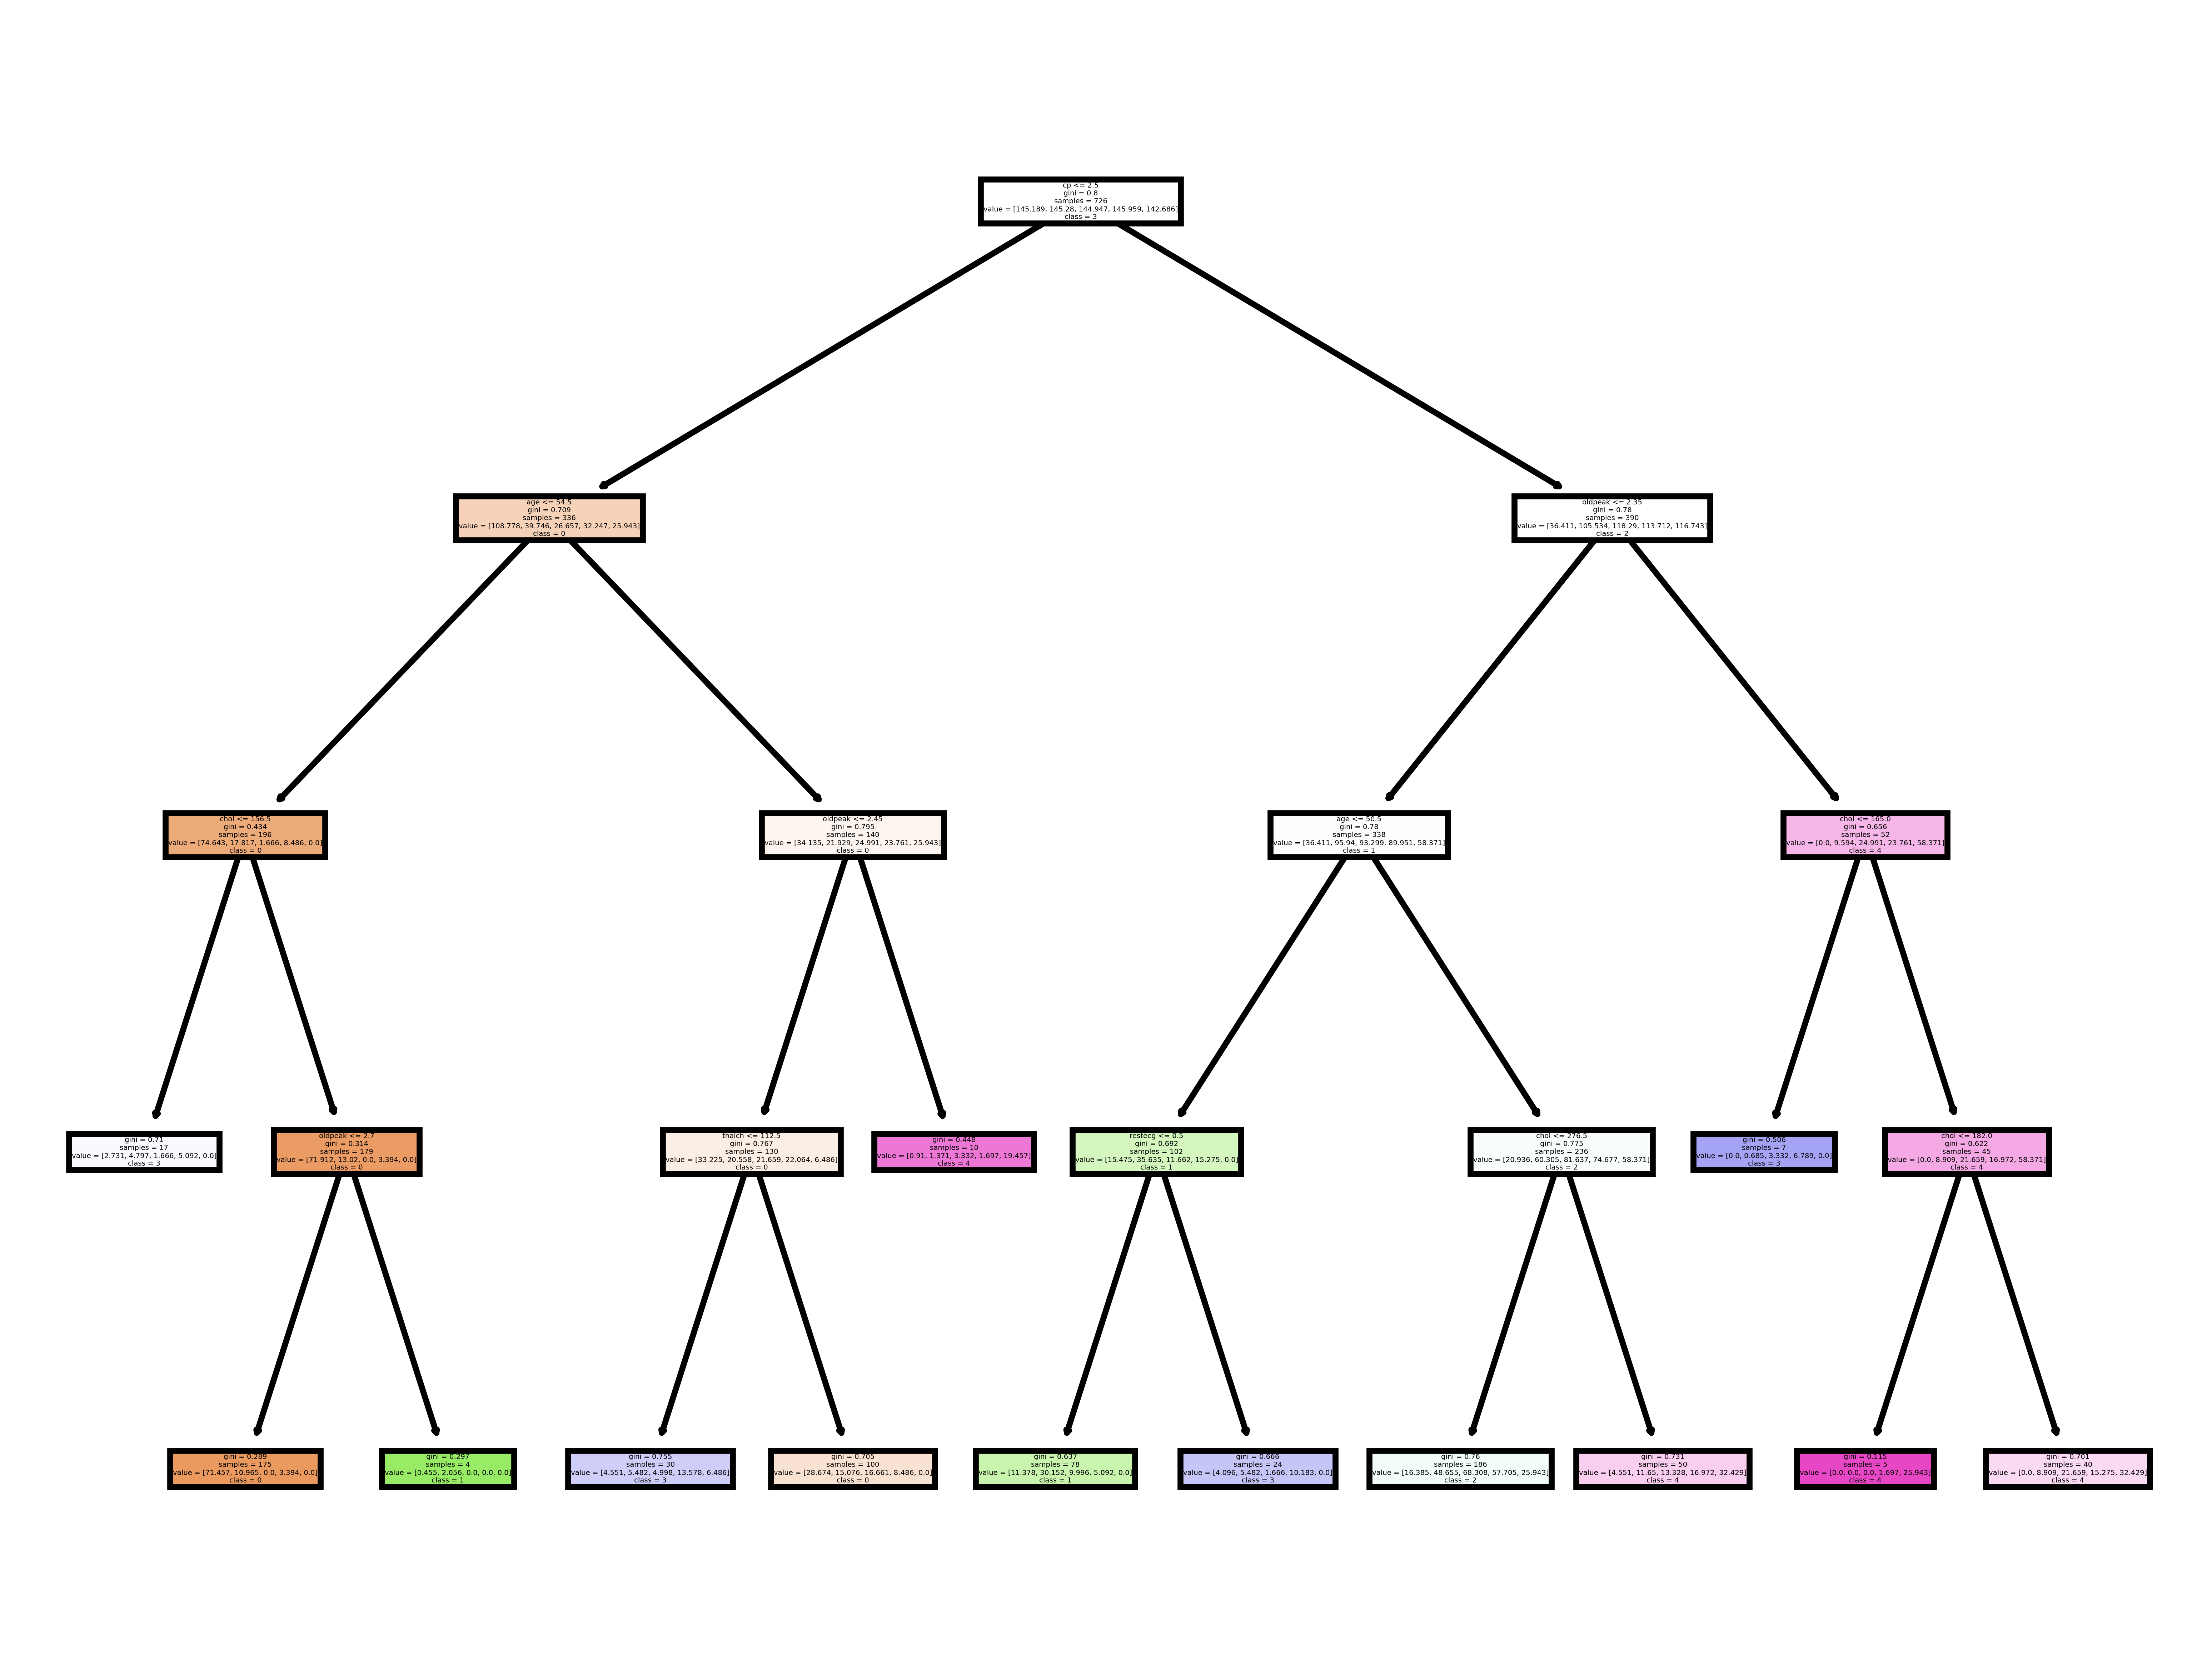

In [38]:
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names=col,class_names=cla,filled=True)#,max_depth=5)
plt.show()

In [39]:
model.feature_importances_

array([0.21352188, 0.        , 0.25889285, 0.        , 0.21922465,
       0.        , 0.03041573, 0.03865627, 0.        , 0.23928862,
       0.        , 0.        ])

In [40]:
model.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'], dtype=object)

In [41]:
df= pd.DataFrame({'feature':model.feature_names_in_,'importance':model.feature_importances_})

In [42]:
df.sort_values('importance',axis=0,ascending=False,ignore_index=True,inplace=True)

In [43]:
df

,feature,importance
0,cp,0.258893
1,oldpeak,0.239289
2,chol,0.219225
3,age,0.213522
4,thalch,0.038656
5,restecg,0.030416
6,sex,0.000000
7,trestbps,0.000000
8,fbs,0.000000
9,exang,0.000000


In [44]:
tree_params={'max_depth':list(range(5,15)),
            'min_samples_split':list(range(10,30))}

In [45]:
model=DecisionTreeClassifier(random_state=10)

In [46]:
gcv=GridSearchCV(estimator=model,param_grid=tree_params,scoring='f1_macro',cv=4,n_jobs=-1)
gcv.fit(train_x,train_y)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20, 21, 22, 23, 24, 25,
                                               26, 27, 28, 29]},
             scoring='f1_macro')

In [47]:
gcv.best_params_

{'max_depth': 7, 'min_samples_split': 12}

In [48]:
gcv.best_score_

0.3537814159625014

In [49]:
#Model Evaluation and Analysis
mdl = DecisionTreeClassifier(random_state=1).fit(train_x,train_y)

In [50]:
path=mdl.cost_complexity_pruning_path(train_x,train_y)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.00091827, 0.00110193, 0.00114784, 0.00118064,
       0.00118064, 0.00122436, 0.00122436, 0.00125219, 0.0012741 ,
       0.00127902, 0.00128558, 0.00130492, 0.0013148 , 0.0013468 ,
       0.00134958, 0.00137741, 0.00137741, 0.00137741, 0.00137741,
       0.00137741, 0.00137741, 0.00137741, 0.00137741, 0.00137741,
       0.00137741, 0.00137741, 0.00137741, 0.00137741, 0.00137741,
       0.00137741, 0.00137741, 0.00137741, 0.00137741, 0.00142843,
       0.00145393, 0.00153046, 0.00156225, 0.0016201 , 0.00165289,
       0.00165289, 0.00165289, 0.00168124, 0.0016835 , 0.00172176,
       0.00172176, 0.00174472, 0.00174472, 0.00175456, 0.00179063,
       0.00183655, 0.00183655, 0.00183655, 0.00183655, 0.00183655,
       0.00183655, 0.00183655, 0.00183655, 0.00192837, 0.00192837,
       0.00194785, 0.00195898, 0.00203551, 0.00204316, 0.00204644,
       0.00206612, 0.00206612, 0.00206612, 0.00206612, 0.00206612,
       0.00206612, 0.00206612, 0.00206612, 0.00206612, 0.00206

In [51]:
accuracy_train=[]
accuracy_test=[]
for i in alphas:
    model = DecisionTreeClassifier(random_state=1,ccp_alpha=i).fit(train_x,train_y)
    y_train_pred=model.predict(train_x)
    y_test_pred= model.predict(test_x)
    accuracy_train.append(accuracy_score(train_y,y_train_pred))
    accuracy_test.append(accuracy_score(test_y,y_test_pred))

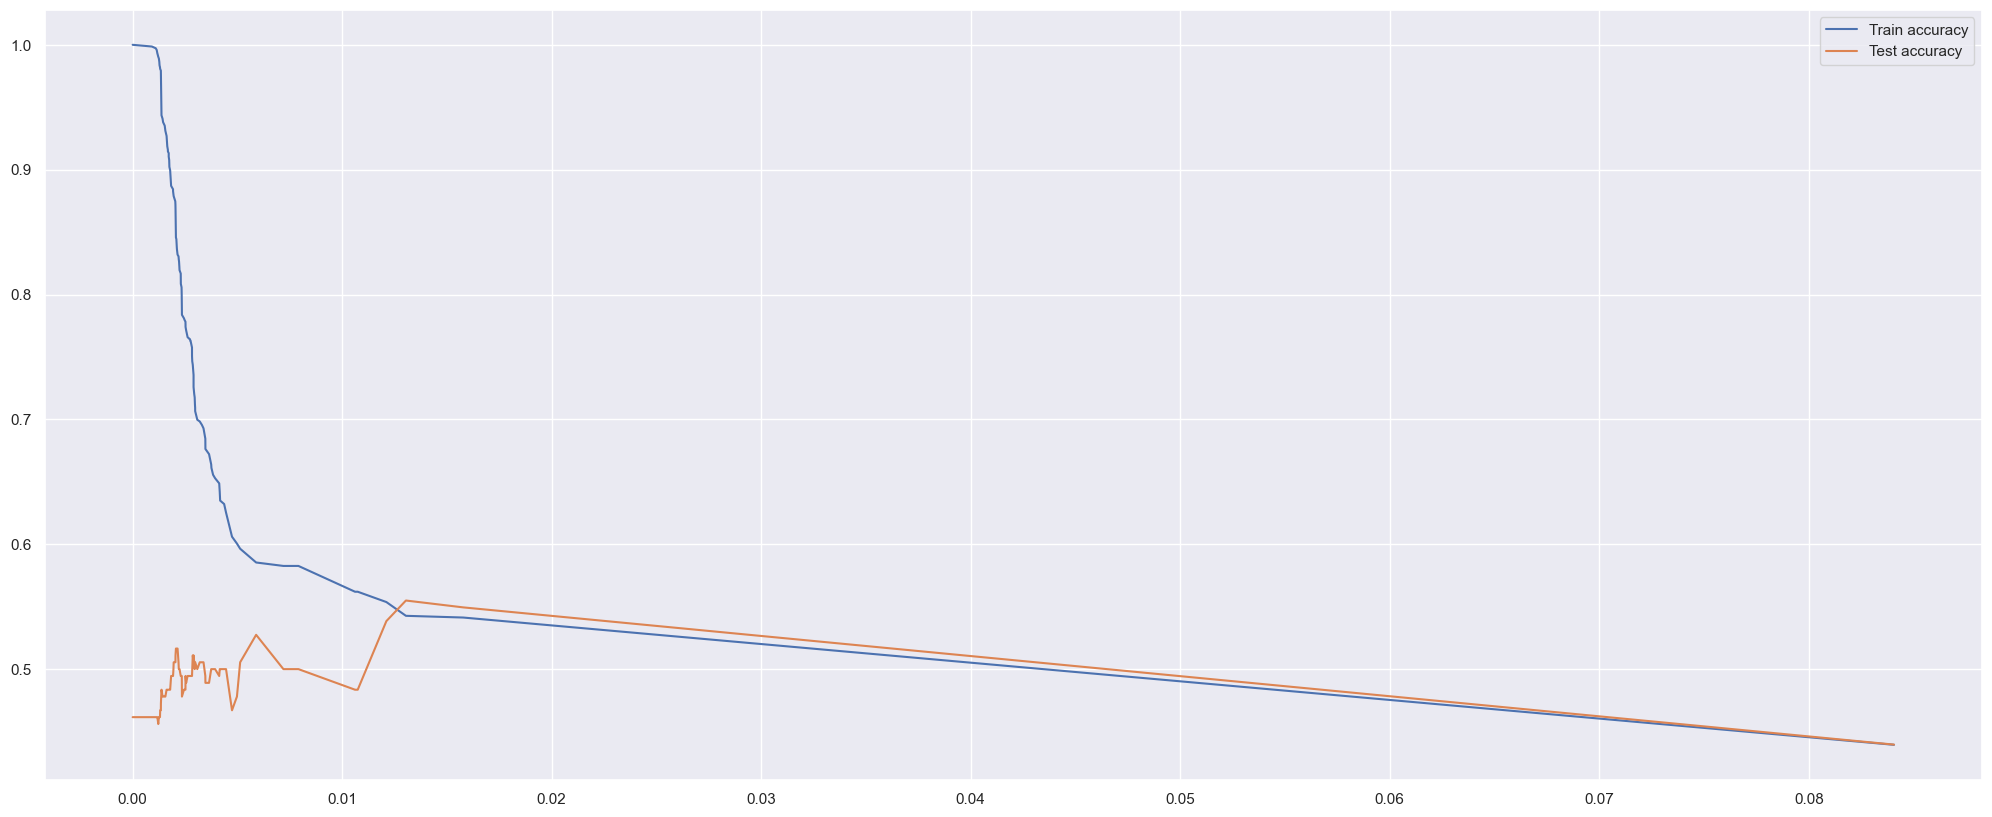

In [52]:
sns.set()
plt.figure(figsize=(25,10))
sns.lineplot(y=accuracy_train,x=alphas,label='Train accuracy')
sns.lineplot(y=accuracy_test,x=alphas,label='Test accuracy')
plt.xticks(ticks=np.arange(0,0.085,0.01))
plt.show()

In [ ]:
1)Common Hyperparameters of Decision Tree Models:
Decision tree models offer various hyperparameters that can significantly influence their performance. Here are some of the most common ones:
Criterion:
Specifies the impurity measure used to evaluate the quality of a split. Common options: "gini" (Gini impurity) and "entropy" (Information gain) Choosing the appropriate criterion can impact the model's ability to capture non-linear relationships and handle class imbalances. Max Depth:
Controls the maximum depth of the tree, limiting the number of levels of decision nodes. Smaller values can help prevent overfitting, while larger values may allow the model to capture more complex patterns. Min Samples Split:
Defines the minimum number of samples required to split an internal node. Smaller values can lead to overfitting, while larger values may result in underfitting. Min Samples Leaf:
Sets the minimum number of samples allowed in a leaf node. Smaller values can lead to overfitting, while larger values may result in underfitting. Max Features:
Determines the number of features considered at each split. Smaller values can help reduce computational complexity, but may also limit the model's ability to capture important relationships. Splitter:
Specifies the strategy used to select the split point at each node. Common options: "best" (selects the best split based on the impurity measure) and "random" (randomly selects a feature and split point)

In [ ]:
2)What is the difference between Label Encoding Vs One-Hot Encoding
Label Encoding:
Assigns a unique integer to each category in a categorical feature. Suitable for ordinal features where the categories have a natural order (e.g., "low," "medium," "high"). Can introduce an artificial ordering among categories that may not be meaningful.
One-Hot Encoding:
Creates a binary column for each category in a categorical feature, indicating whether the category is present (1) or absent (0). Suitable for nominal features where the categories do not have a natural order (e.g., "red," "green," "blue"). Can increase the dimensionality of the data, potentially leading to computational overhead.